A Customer Credit Card Information Dataset which can be used for Identifying Loyal Customers, Customer Segmentation, Targeted Marketing and other such use cases in the Marketing Industry.

A few tasks that can be performed using this dataset is as follows:

Perform Data-Cleaning,Preprocessing,Visualizing and Feature Engineering on the Dataset.
Implement Heirarchical Clustering, K-Means/DBSCAN Clustering models.
Create RFM (Recency,Frequency,Monetary) Matrix to identify Loyal Customers.
Content
The Attributes Include:

Sl_No
Customer Key
AvgCreditLimit
TotalCreditCards
Totalvisitsbank
Totalvisitsonline
Totalcallsmade

In [1]:
# Import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder
import sklearn.utils
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.manifold import TSNE

In [2]:
# Read file/data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit Card Customer Data.csv')
print(df)

     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2              

In [3]:
type(df)
df.shape

(660, 7)

In [4]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# To identify null values
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
# Checking for duplicate records.
df.duplicated().sum()

0

In [9]:
df.drop('Sl_No', axis = 1, inplace= True)
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [10]:
# Create a new column called "Credit_Utilization_Ratio" assigns the calculated credit utilization ratio for each customer.
df['Credit_Utilization_Ratio'] = df['Avg_Credit_Limit'] / df['Total_Credit_Cards']

In [11]:
# Create a new column called "Interaction_Score" can help identify customers who are more actively engaged with the bank's services.
df['Interaction_Score'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']

In [12]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
0,87073,100000,2,1,1,0,50000.000000,2
1,38414,50000,3,0,10,9,16666.666667,19
2,17341,50000,7,1,3,4,7142.857143,8
3,40496,30000,5,1,1,4,6000.000000,6
4,47437,100000,6,0,12,3,16666.666667,15


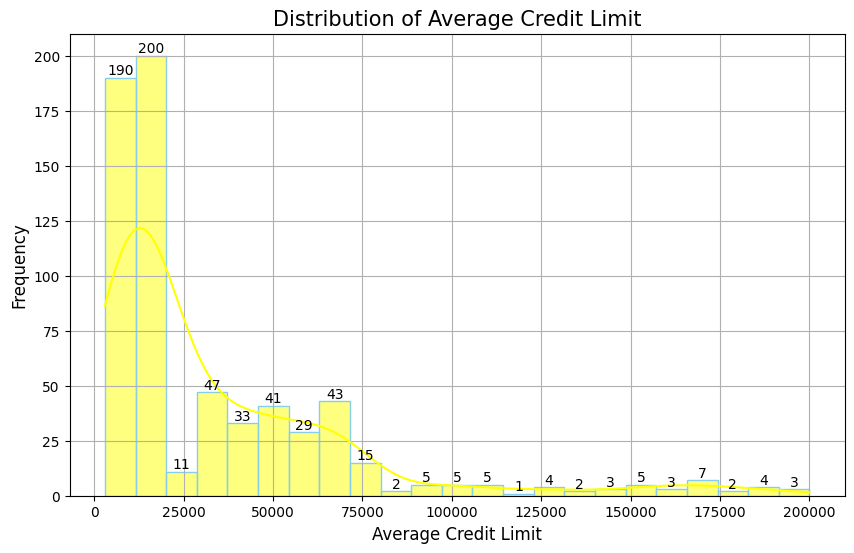

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=df, x='Avg_Credit_Limit', kde=True, ax=ax, color='yellow', edgecolor='skyblue', linewidth=1)
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Distribution of Average Credit Limit', fontsize=15)
ax.set_xlabel('Average Credit Limit', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(True)

plt.show()

<ipython-input-14-2c84111a0e46>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Total_Credit_Cards', ax=ax, palette='bright')


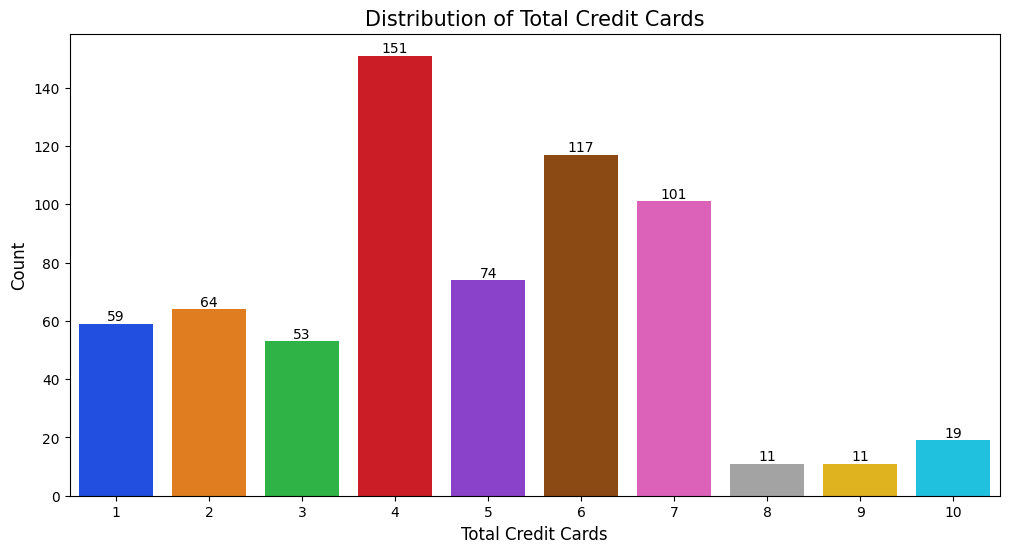

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Total_Credit_Cards', ax=ax, palette='bright')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Distribution of Total Credit Cards', fontsize=15)
ax.set_xlabel('Total Credit Cards', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

<ipython-input-15-5a54dc743bcd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Total_visits_bank', ax=ax, palette='viridis')


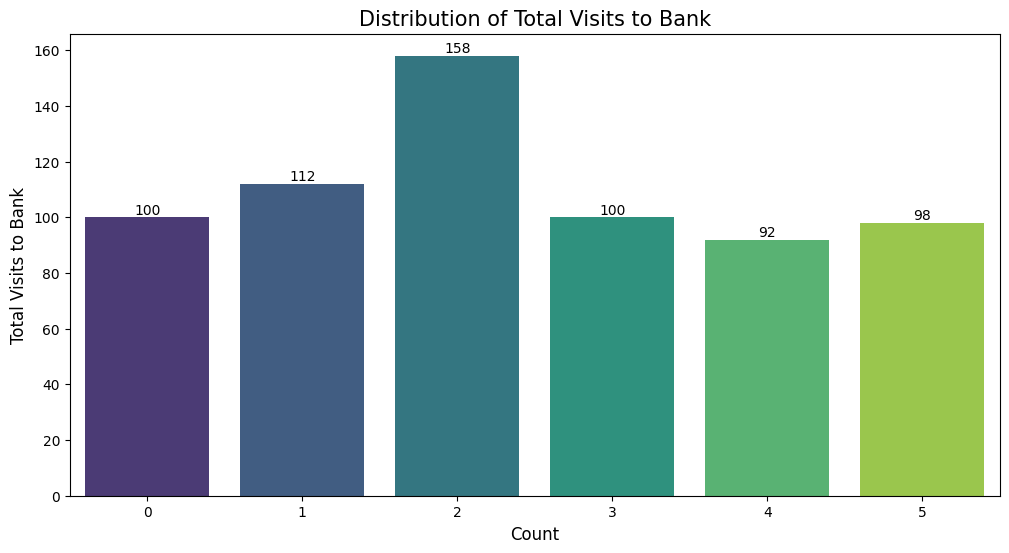

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Total_visits_bank', ax=ax, palette='viridis')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Distribution of Total Visits to Bank', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Total Visits to Bank', fontsize=12)

plt.show()

<ipython-input-16-f62d6ae03103>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Interaction_Score', ax=ax, palette='bright')


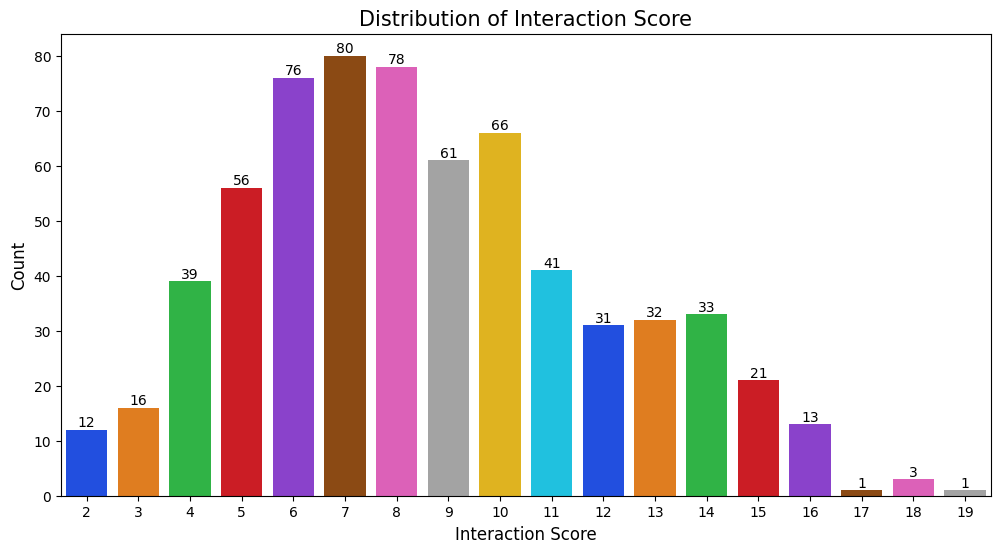

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=df, x='Interaction_Score', ax=ax, palette='bright')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Distribution of Interaction Score', fontsize=15)
ax.set_xlabel('Interaction Score', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

<ipython-input-28-2063903b873a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Credit_Utilization_Ratio', ax=ax, palette='bright')


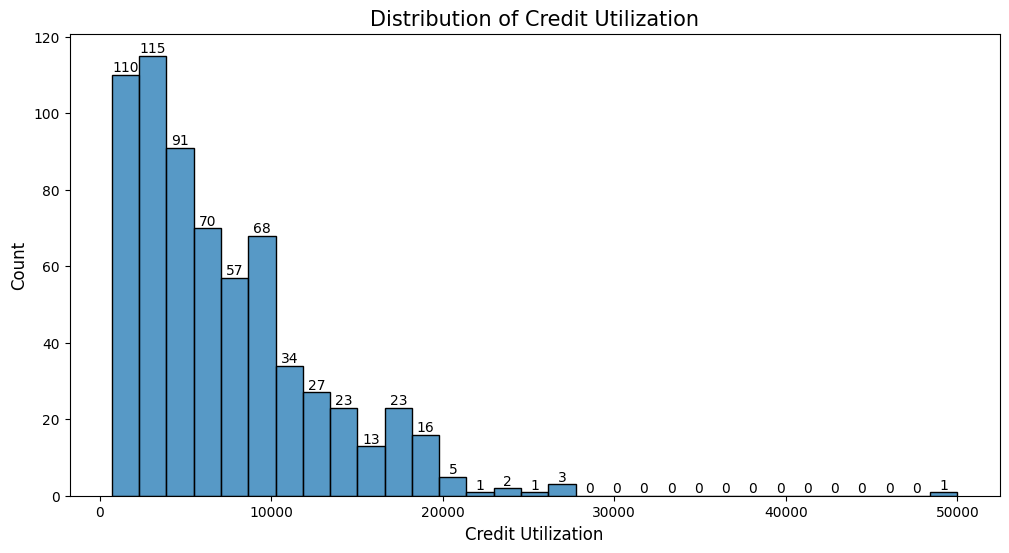

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df, x='Credit_Utilization_Ratio', ax=ax, palette='bright')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Distribution of Credit Utilization', fontsize=15)
ax.set_xlabel('Credit Utilization', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

In [17]:
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(df.iloc[:,1:])

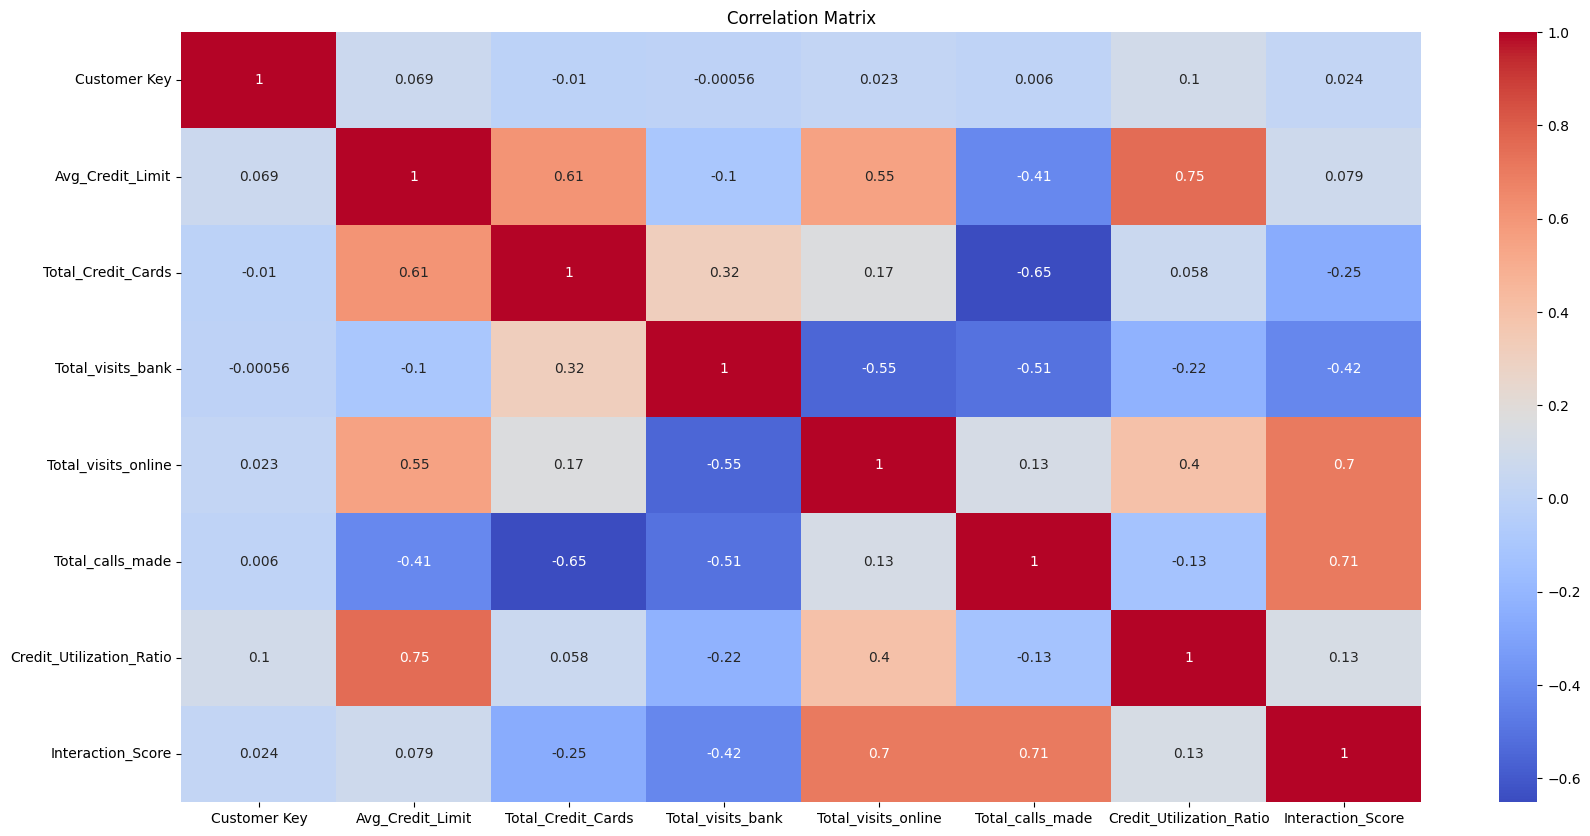

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

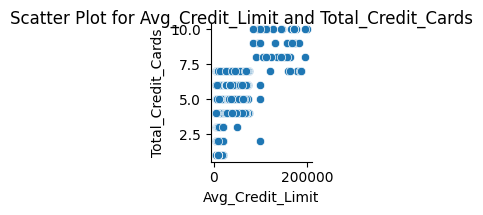

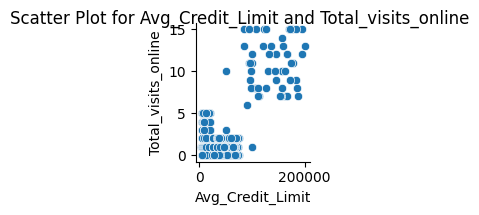

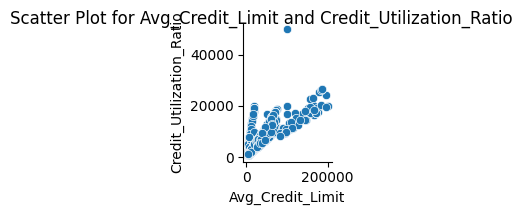

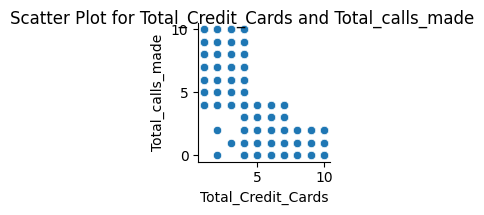

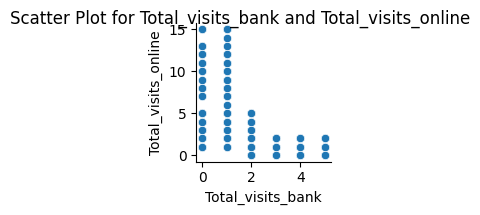

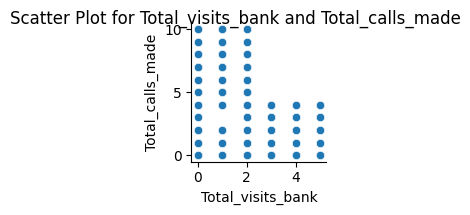

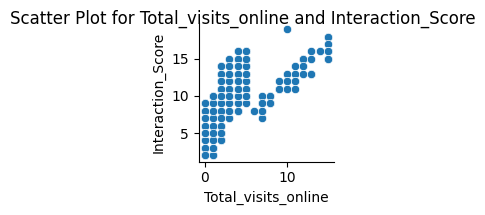

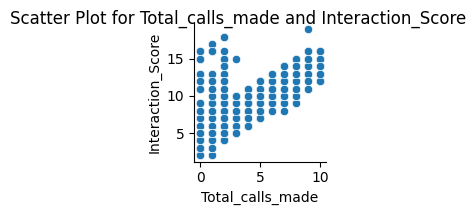

In [23]:
# Find pairs of columns with correlation greater than 0.50or less than -0.5
high_corr_pairs = []
checked = set()
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2 and abs(df.corr().loc[col1, col2]) > 0.5 and (col2, col1) not in checked:  # Use df.corr().loc for correlation access
            high_corr_pairs.append((col1, col2))
            checked.add((col1, col2))

# scatter plot matrix for the selected pairs
for pair in high_corr_pairs:
    sns.pairplot(df, height=2, x_vars=pair[0], y_vars=pair[1], kind='scatter')
    plt.suptitle(f'Scatter Plot for {pair[0]} and {pair[1]}', y=1.02)
    plt.show()

In [25]:
df.drop('Customer Key', axis = 1, inplace= True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Credit_Utilization_Ratio,Interaction_Score
0,100000,2,1,1,0,50000.000000,2
1,50000,3,0,10,9,16666.666667,19
2,50000,7,1,3,4,7142.857143,8
3,30000,5,1,1,4,6000.000000,6
4,100000,6,0,12,3,16666.666667,15


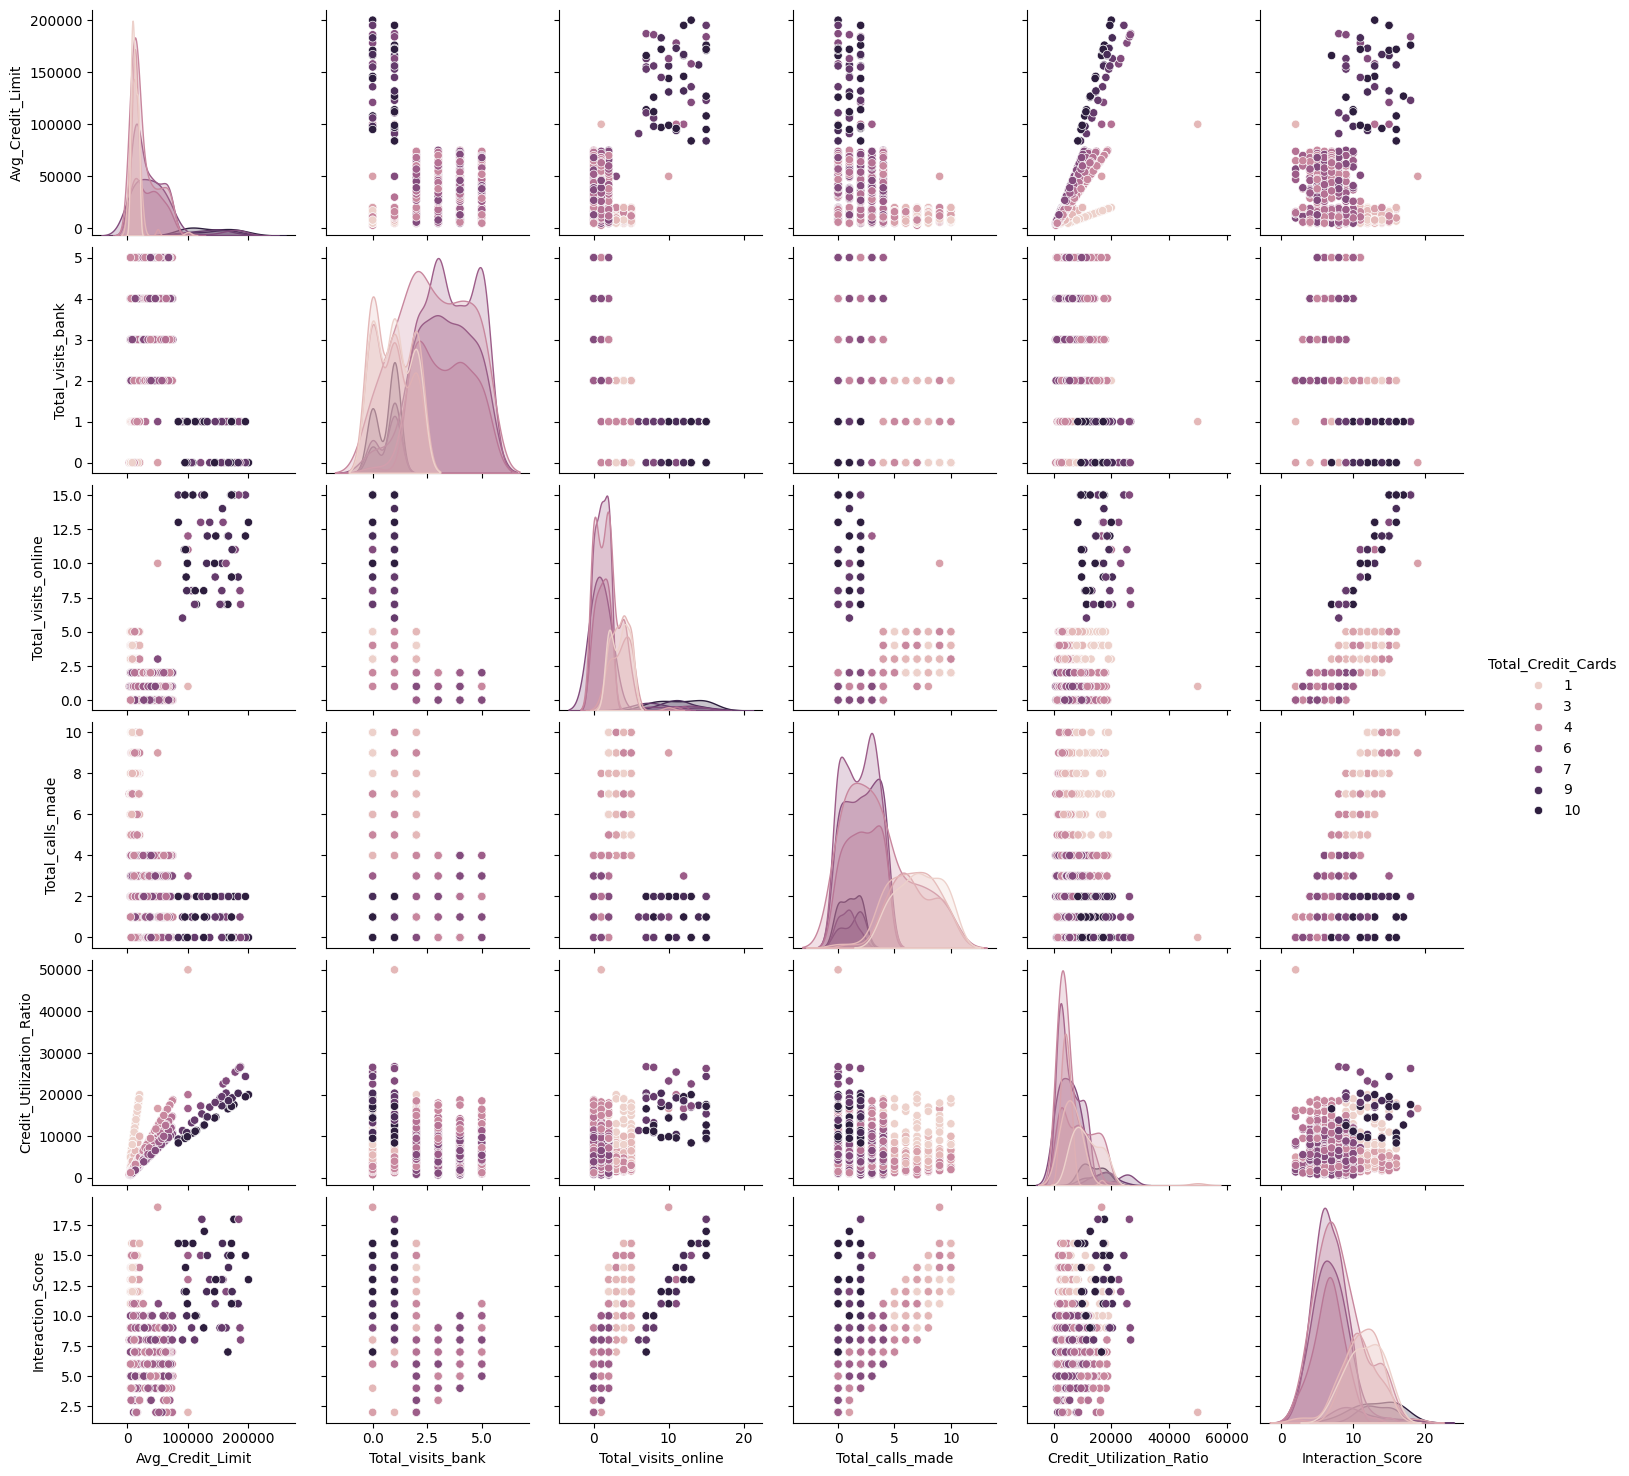

In [26]:
sns.pairplot(df, hue='Total_Credit_Cards')
plt.show()

In [31]:
Clus_dataset=df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]

In [34]:
Clus_dataset = np.nan_to_num(Clus_dataset)
Clus_dataset = np.array(Clus_dataset, dtype=np.float64)
Clus_dataset = StandardScaler().fit_transform(Clus_dataset)

db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataset)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
clus_dataset["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

<ipython-input-34-9f8e791e317d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clus_dataset["Clus_Db"]=labels


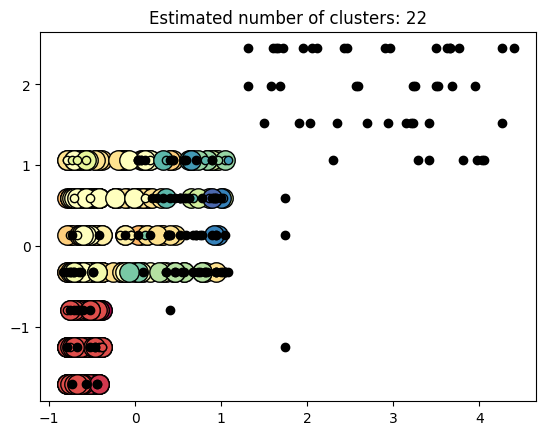

Number of Noise:  141


In [35]:
# DBSCAN Cluster for Customer Analysis

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
        if k == -1:
                col = [0,0,0,1]
        class_member_mask = (labels == k)

        xy = Clus_dataset[class_member_mask & core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

        xy = Clus_dataset[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()
n_noise = list(labels).count(-1)
print('Number of Noise: ', n_noise)

In [43]:
for clust_number in set(labels):
    clust_set = clus_dataset[clus_dataset.Clus_Db == clust_number] # Use the DataFrame clus_dataset
    if clust_number != -1:
        print("====","Cluster {}".format(clust_number), "====")
        print("Average Credit Limit: ", str(round(np.mean(clust_set['Avg_Credit_Limit'])))) # Access columns by name
        print("Average Number of Creditcards: ", str(round(np.mean(clust_set['Total_Credit_Cards']))))
        print("Average Bank Visits: ", str(round(np.mean(clust_set['Total_visits_bank']))))
        print("Average Online Visits: ", str(round(np.mean(clust_set['Total_visits_online']))))
        print("Average Calls Made: ", str(round(np.mean(clust_set['Total_calls_made']))))
        print("Count: ", str(len(clust_set))) # Use len() to get the count of rows in the DataFrame
        print("--------------------------------------")

==== Cluster 0 ====
Average Credit Limit:  12301
Average Number of Creditcards:  2
Average Bank Visits:  0
Average Online Visits:  4
Average Calls Made:  7
Count:  73
--------------------------------------
==== Cluster 1 ====
Average Credit Limit:  12300
Average Number of Creditcards:  1
Average Bank Visits:  2
Average Online Visits:  4
Average Calls Made:  8
Count:  10
--------------------------------------
==== Cluster 2 ====
Average Credit Limit:  12775
Average Number of Creditcards:  2
Average Bank Visits:  1
Average Online Visits:  4
Average Calls Made:  7
Count:  71
--------------------------------------
==== Cluster 3 ====
Average Credit Limit:  10810
Average Number of Creditcards:  2
Average Bank Visits:  2
Average Online Visits:  3
Average Calls Made:  6
Count:  42
--------------------------------------
==== Cluster 4 ====
Average Credit Limit:  11500
Average Number of Creditcards:  4
Average Bank Visits:  2
Average Online Visits:  4
Average Calls Made:  9
Count:  6
----------